<a href="https://colab.research.google.com/github/Prateeklk/DataScience_Projects/blob/main/Crime_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**a. Load the data into the DataFrame using the URL.**

In [ ]:
url = "https://data.lacity.org/api/views/2nrs-mtv8/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

**b.Initial Exploratory and visualization:**

*i.Print the metadata of column information.*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978628 entries, 0 to 978627
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           978628 non-null  int64  
 1   Date Rptd       978628 non-null  object 
 2   DATE OCC        978628 non-null  object 
 3   TIME OCC        978628 non-null  int64  
 4   AREA            978628 non-null  int64  
 5   AREA NAME       978628 non-null  object 
 6   Rpt Dist No     978628 non-null  int64  
 7   Part 1-2        978628 non-null  int64  
 8   Crm Cd          978628 non-null  int64  
 9   Crm Cd Desc     978628 non-null  object 
 10  Mocodes         834648 non-null  object 
 11  Vict Age        978628 non-null  int64  
 12  Vict Sex        841430 non-null  object 
 13  Vict Descent    841419 non-null  object 
 14  Premis Cd       978613 non-null  float64
 15  Premis Desc     978043 non-null  object 
 16  Weapon Used Cd  325959 non-null  float64
 17  Weapon Des

In [ ]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


*ii. What is the total number of crimes committed according to the description
of the crime code? Make a visualization using just one graph that shows a
distribution of several crimes.*

In [ ]:
total_crime = df['Crm Cd'].value_counts()
crime  = total_crime.sum()
print(f"Total crimes committed is {crime}")


Total crimes committed is 978628


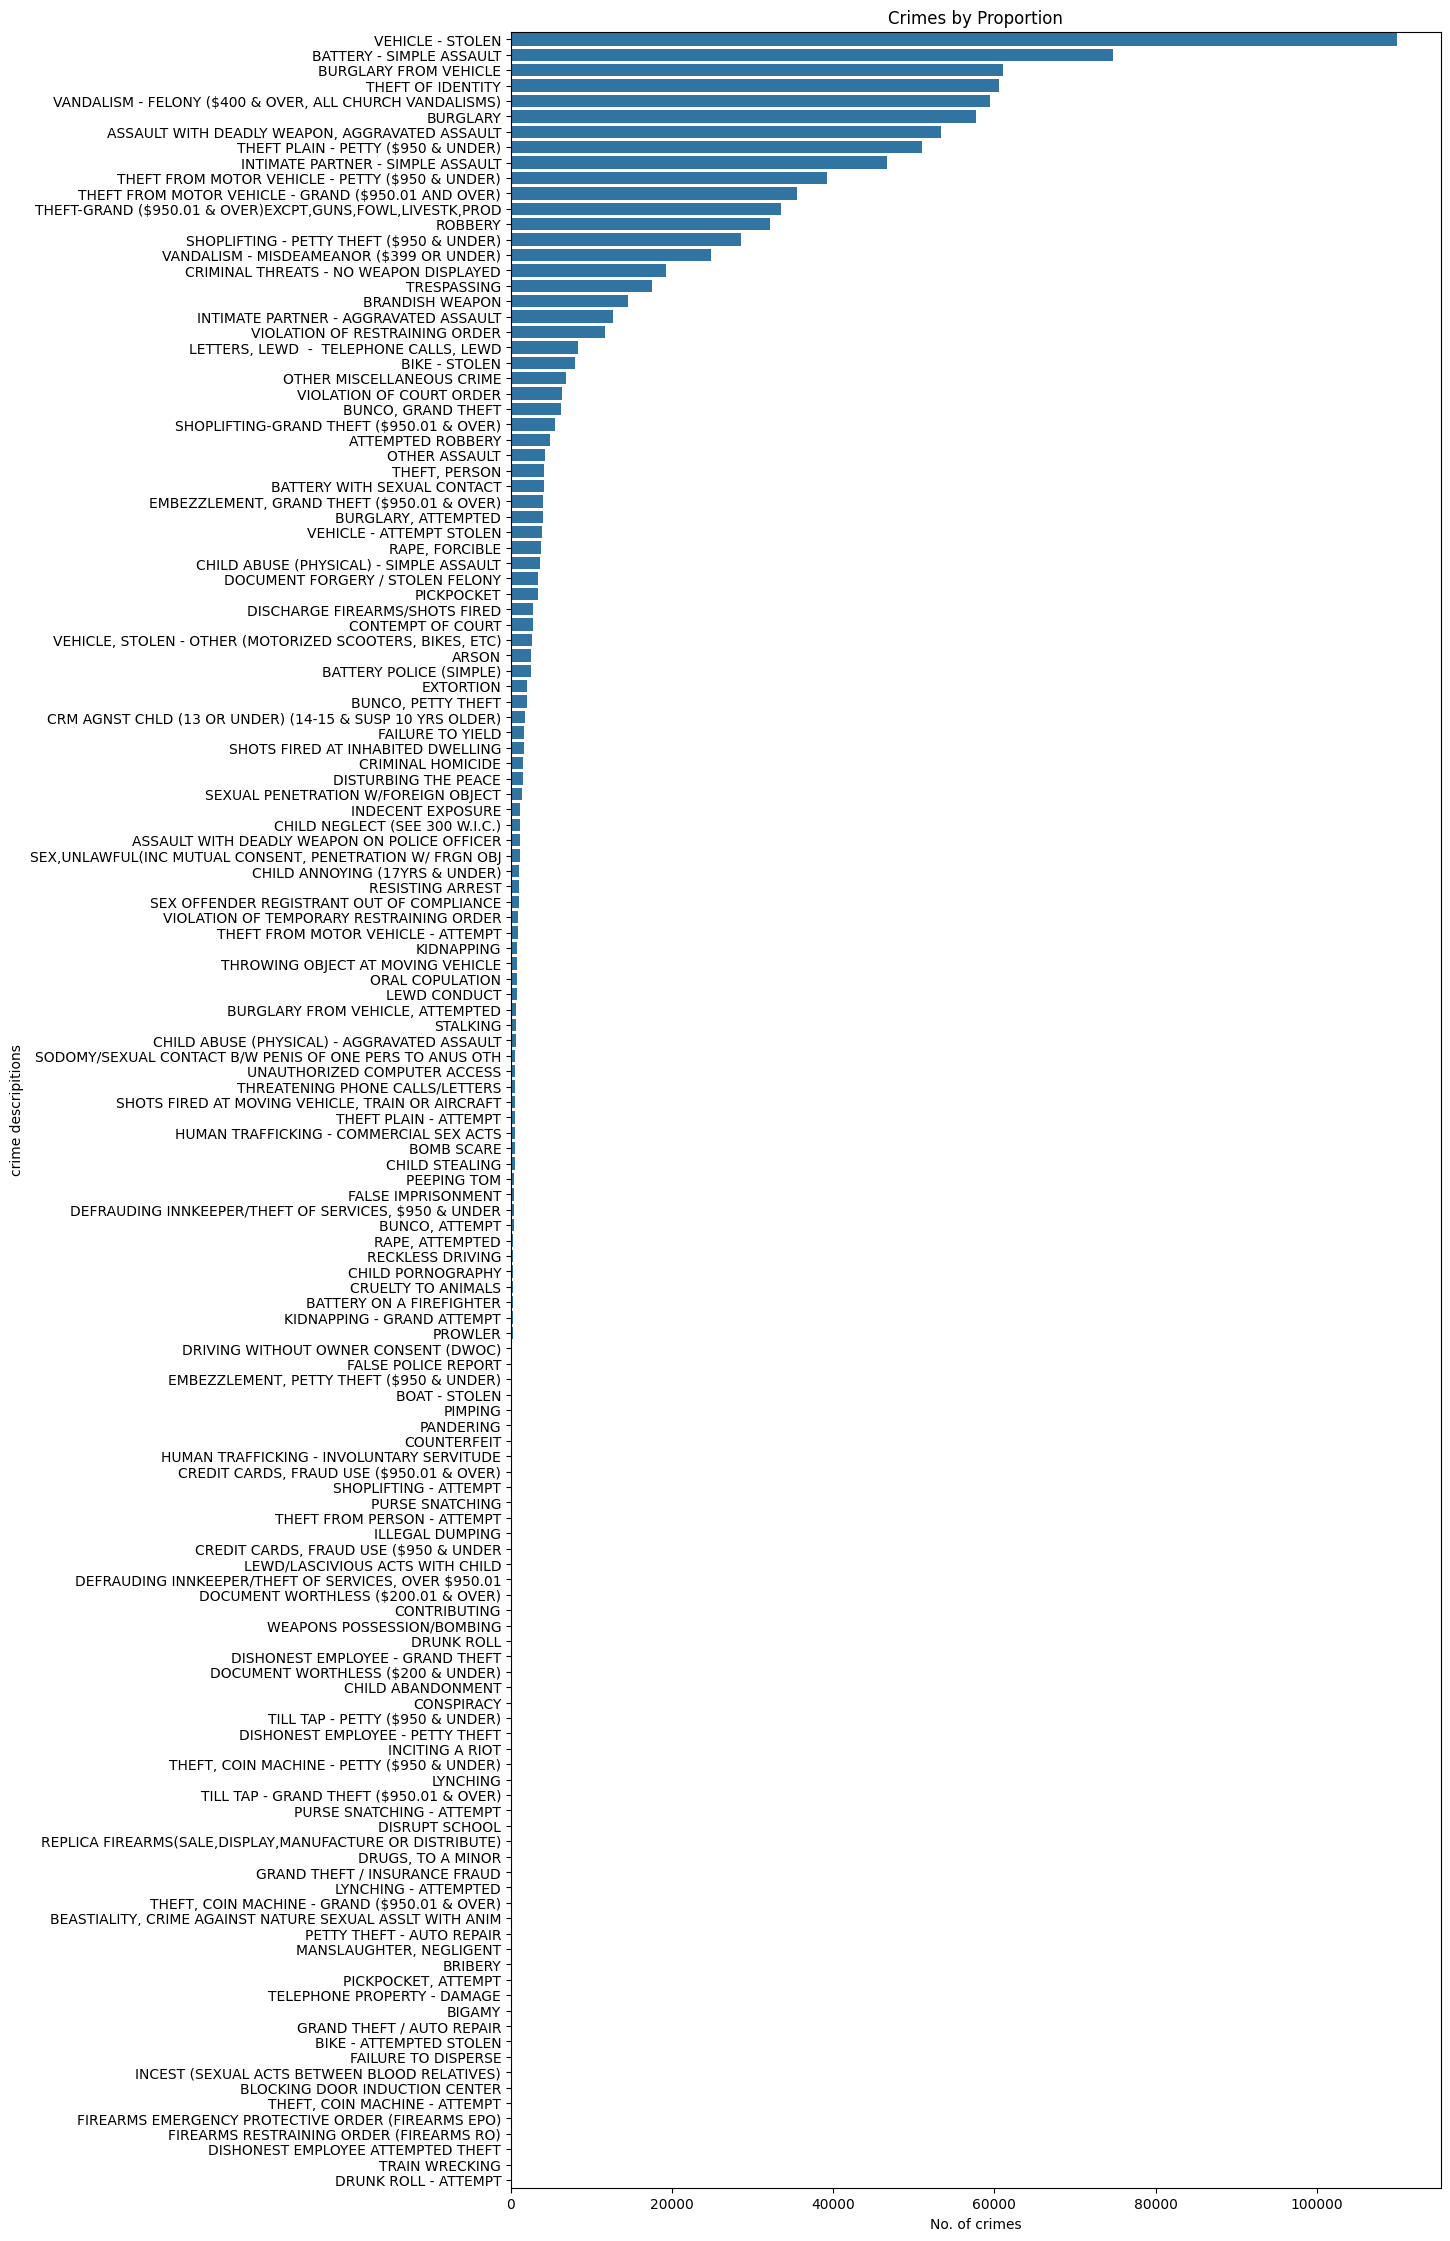

In [ ]:
#bar chart
total_crime = df['Crm Cd Desc'].value_counts()
plt.figure(figsize=(12, 28))
sns.barplot(x=total_crime.values, y=total_crime.index)
plt.title('Crimes by Proportion')
plt.xlabel('No. of crimes')
plt.ylabel('crime descripitions')
plt.show()


*iii. Make a visualization to suggest highest crime prone areas. You may plot
multiple graphs.*

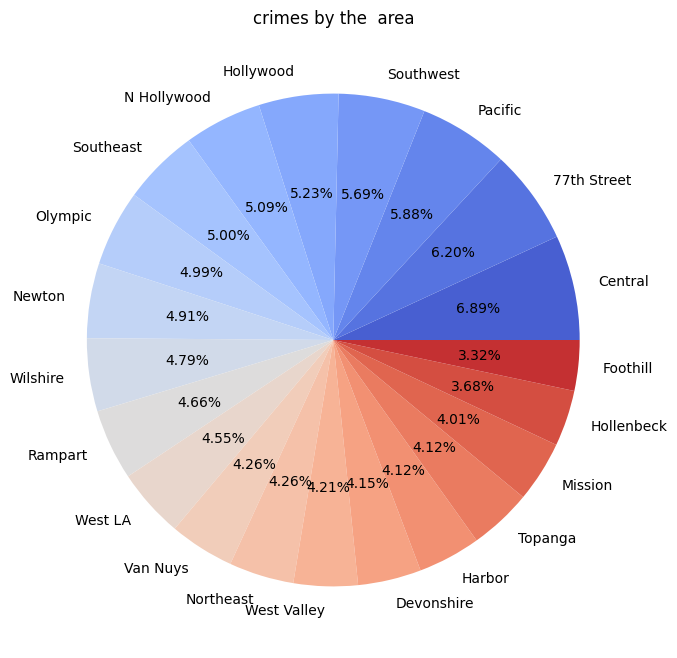

In [ ]:
#pie chart
totalCrimeByArea = df['AREA NAME'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(totalCrimeByArea, labels=totalCrimeByArea.index, autopct='%1.2f%%', colors=sns.color_palette("coolwarm", n_colors=len(totalCrimeByArea)))
plt.title('crimes by the  area')
plt.show()


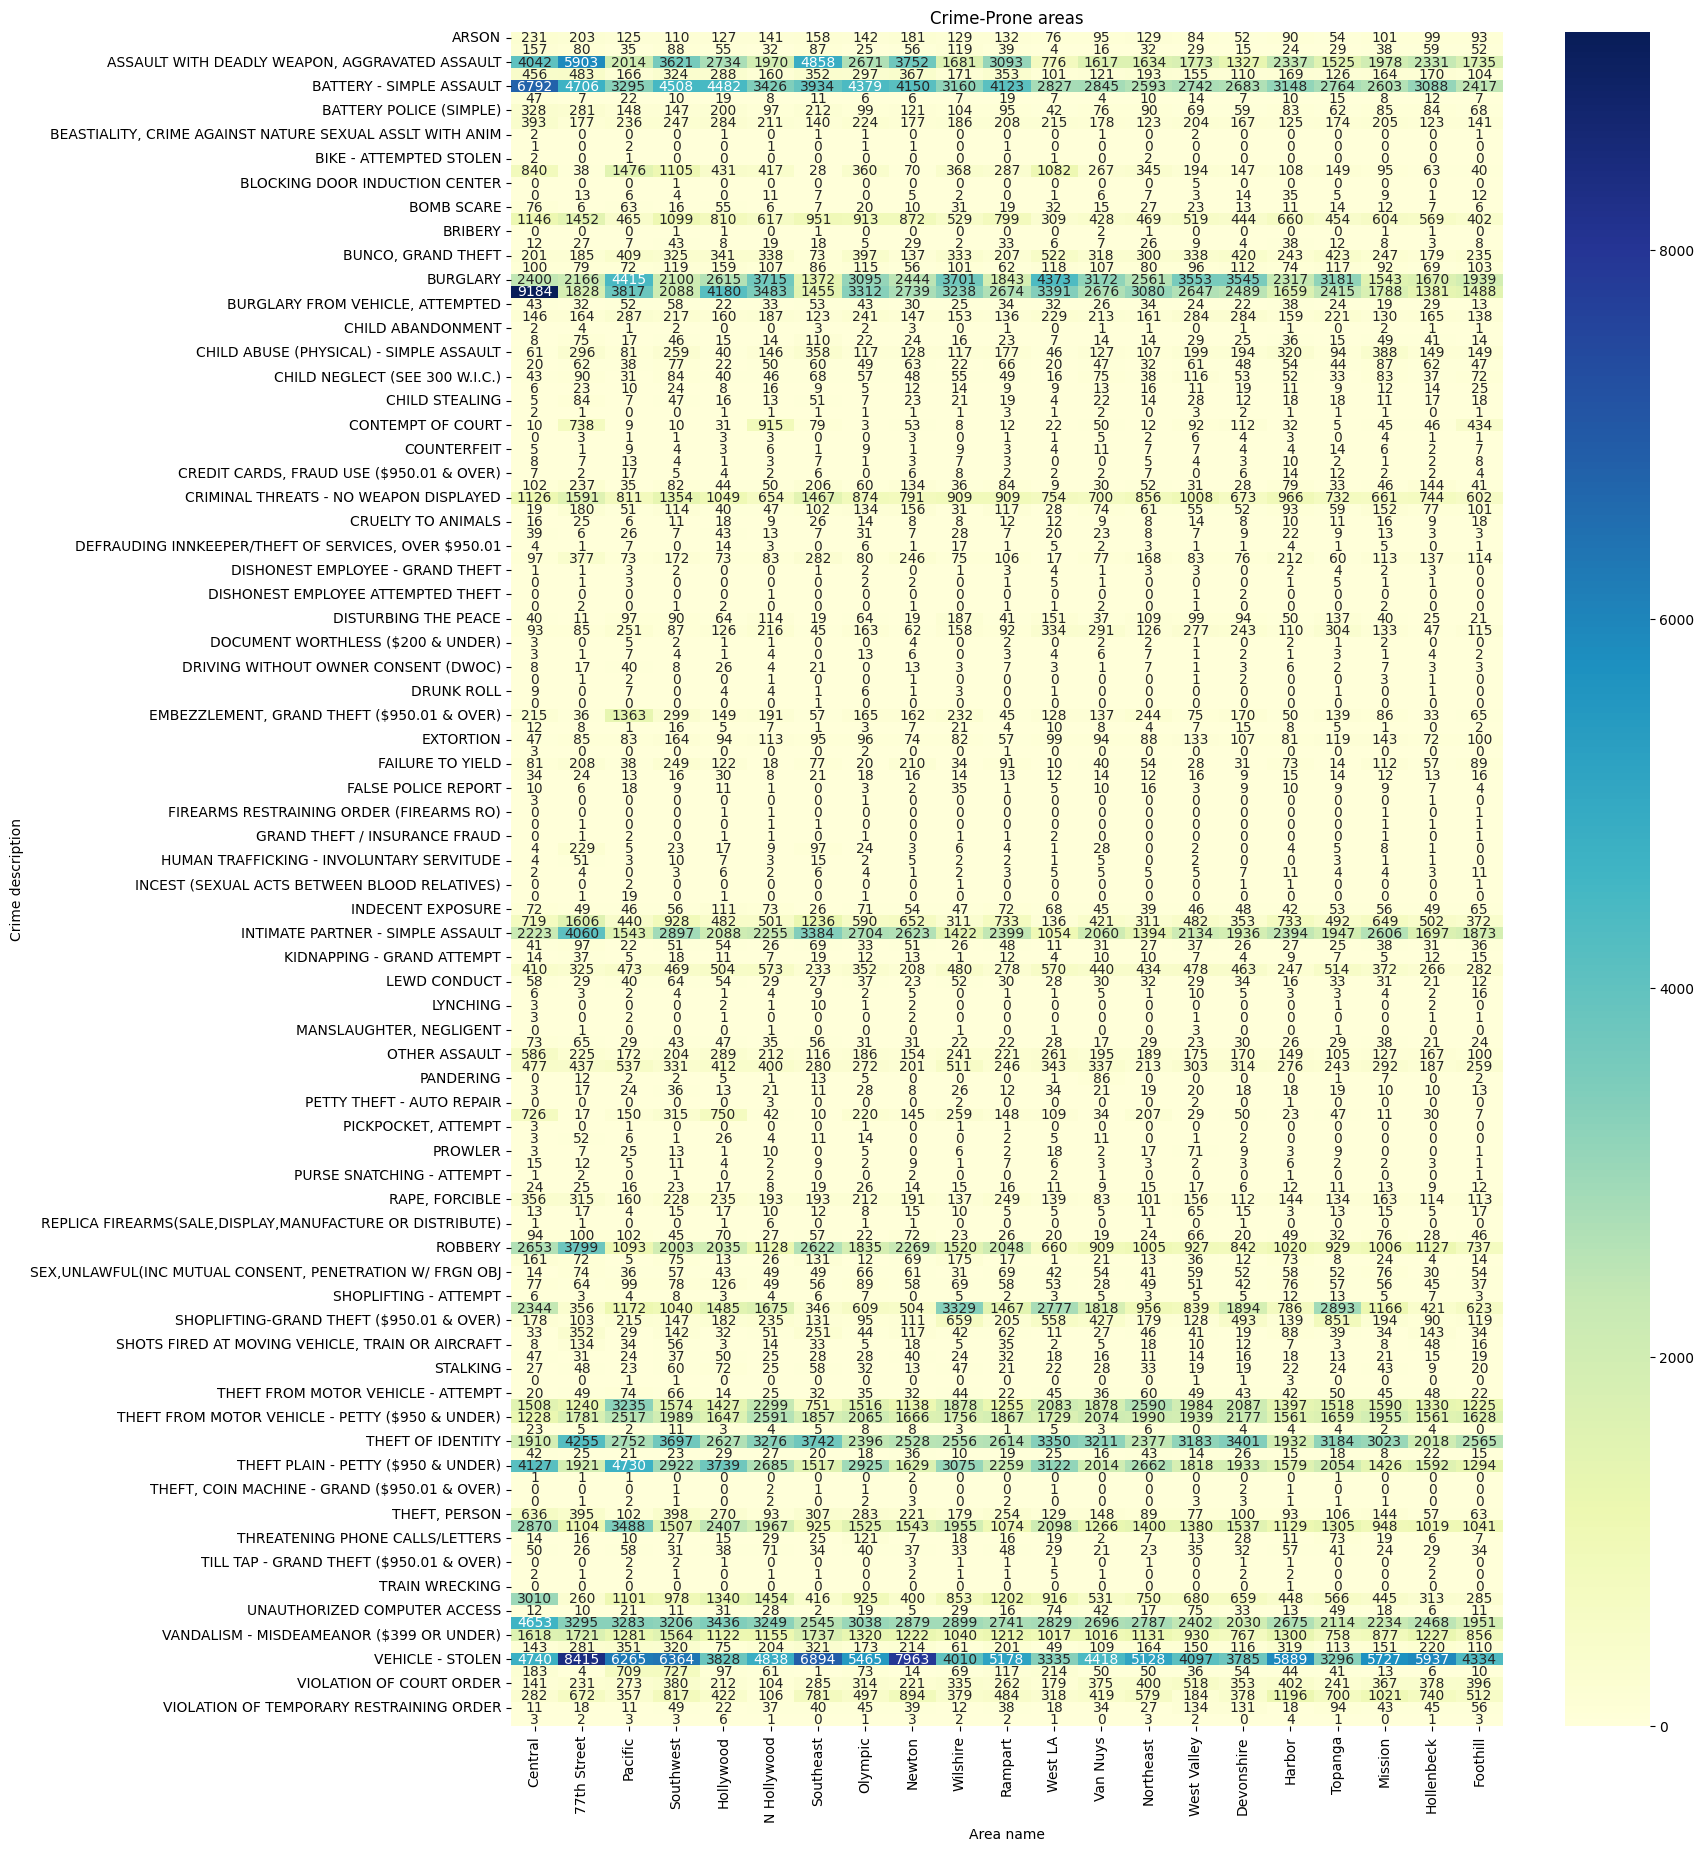

In [ ]:
#heat Map
crime_area_pivot = df.pivot_table(index='Crm Cd Desc', columns='AREA NAME', aggfunc='size', fill_value=0)

plt.figure(figsize=(16, 22))
sns.heatmap(crime_area_pivot[totalCrimeByArea.index], cmap='YlGnBu', annot=True, fmt="d")
plt.title('Crime-Prone areas')
plt.xlabel('Area name')
plt.ylabel('Crime description')
plt.show()


iv. (10pts) Make a visualization to warn general public about the trend crimes
according to the time of crime occurence, sex and age of victim and the area in
which it can occur. You may plot multiple graphs.

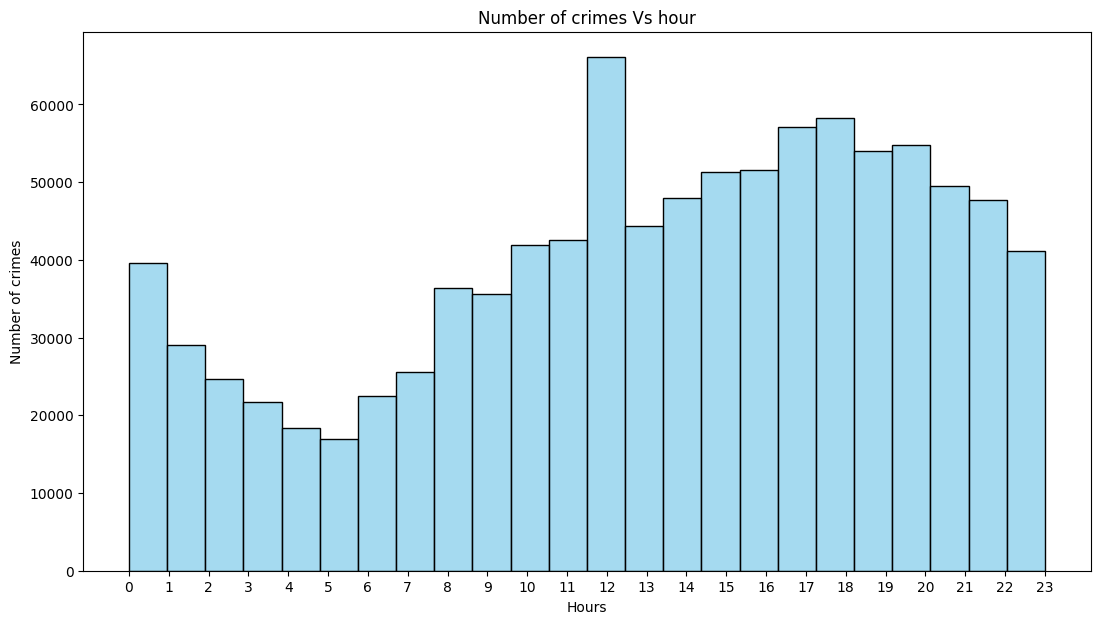

In [ ]:
df['TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4)
df['Hour'] = df['TIME OCC'].str[:2].astype(int) # getting the hour from occurace time
#histogram
plt.figure(figsize=(13, 7))
sns.histplot(df['Hour'], bins=24, kde=False, color='skyblue')
plt.title('Number of crimes Vs hour')
plt.xlabel('Hours')
plt.ylabel('Number of crimes')
plt.xticks(range(0, 24))
plt.show()


<ipython-input-10-de683f6be577>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Vict Sex', y='Vict Age', data=df, palette='viridis')


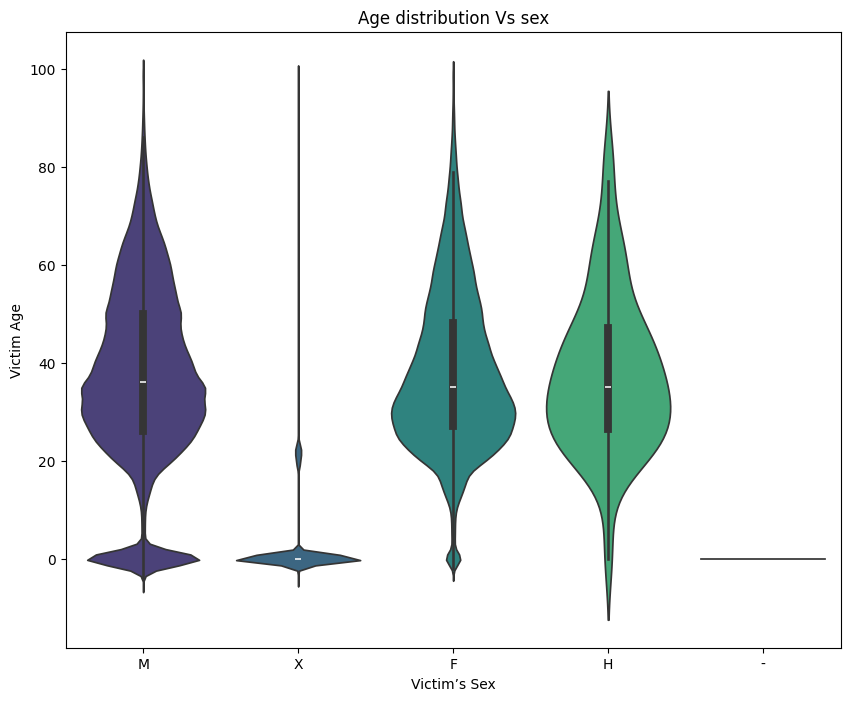

In [ ]:
#violin plot
plt.figure(figsize=(10, 8))
sns.violinplot(x='Vict Sex', y='Vict Age', data=df, palette='viridis')
plt.title('Age distribution Vs sex')
plt.xlabel('Victim’s Sex')
plt.ylabel('Victim Age')
plt.show()


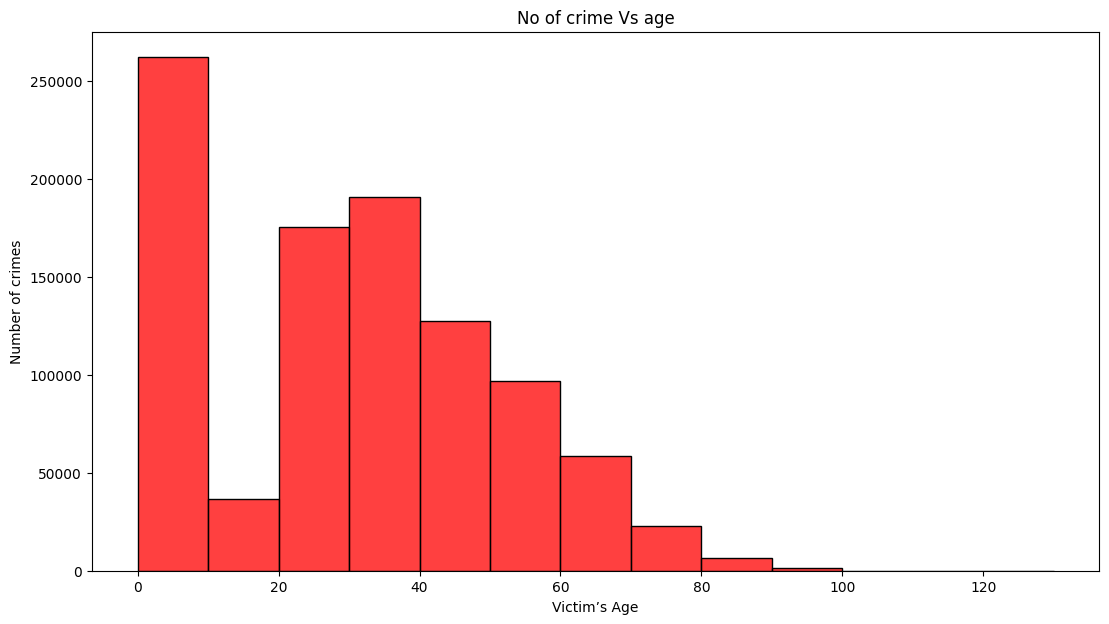

In [ ]:
#histogram
plt.figure(figsize=(13, 7))
sns.histplot(df['Vict Age'], bins=range(0, 140, 10), color='red')
plt.title('No of crime Vs age')
plt.xlabel('Victim’s Age')
plt.ylabel('Number of crimes')
plt.show()

<ipython-input-12-2b7eac825650>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='AREA NAME', order=df['AREA NAME'].value_counts().index, palette='viridis')


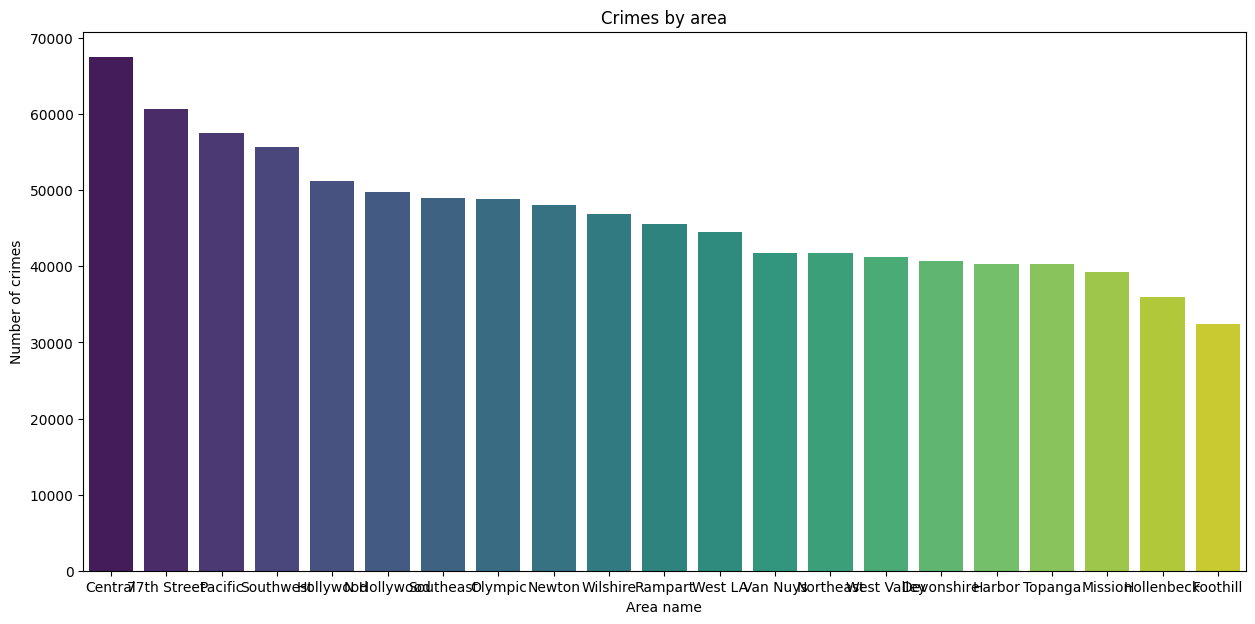

In [ ]:
#count graph
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='AREA NAME', order=df['AREA NAME'].value_counts().index, palette='viridis')
plt.title('Crimes by area')
plt.xlabel('Area name')
plt.ylabel('Number of crimes')
plt.show()


**c. Investigating Patterns of Vehicle Thefts in Los Angeles:**

*i) Apply conditions to make it a valid problem statement. Also provide features
which you think are important according to your problem statement.*

How can we analyse the patterns of vehicle thefts in Los Angeles based on factors such and other relevant attributes to uncover insights that can aid in crime prevention?

The key features for analysing vehicle theft patterns in Los Angeles include the time and hour of occurrence, which help in identifying when most thefts happen, and the location, including specific areas and neighbourhoods, to highlight high-theft regions. The date of the crime can reveal seasonal or daily trends, while victim details, such as age and sex. Crime codes ensure we're focusing only on vehicle theft cases, and other factors like weapon involvement, case status, and the type of location where the theft occurred give additional context to better understand the nature of these crimes.


*ii.Explain your approach to your problem statement.*

The approach starts with cleaning and prepping the data to fix any missing or inconsistent values. Then, the date and time columns will be reformatted for better time-based analysis. After that, exploratory data analysis (EDA) will be performed to visualize vehicle thefts across different areas, times of day, and days of the week. This will involve using bar plots and heatmaps to pinpoint the areas and times with the highest crime rates.

Additionally, trends across various seasons and neighborhoods will be explored to identify any patterns or spikes in theft activity. By breaking down the data this way, the analysis will reveal the most vulnerable areas and times, which can help with better resource allocation and developing effective crime prevention strategies.

*iii.Perform data cleaning to get the pure data for this problem. Explain your data cleaning steps.( At least 3 cleaning steps)*


In [ ]:
#step - 1
#drop the columns which are not important
df.drop(['Mocodes','Rpt Dist No','DR_NO'], axis=1, inplace = True)

In [ ]:
#step - 2
#delete all the rcords except Crm Cd Desc  = "VEHICLE - STOLEN" AND "BIKE - ATTEMPTED STOLEN"
df_vehicle_stolen = df[df['Crm Cd Desc'].isin(['VEHICLE - STOLEN', 'BIKE - ATTEMPTED STOLEN'])]

In [ ]:
df_vehicle_stolen['Crm Cd Desc'].unique()

array(['VEHICLE - STOLEN', 'BIKE - ATTEMPTED STOLEN'], dtype=object)

In [ ]:
#step - 3
#conver the object type to date time
df_vehicle_stolen['DATE OCC'] = pd.to_datetime(df_vehicle_stolen['DATE OCC'])
df_vehicle_stolen['Date Rptd'] = pd.to_datetime(df_vehicle_stolen['Date Rptd'])


<ipython-input-16-1279a059978c>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_vehicle_stolen['DATE OCC'] = pd.to_datetime(df_vehicle_stolen['DATE OCC'])
<ipython-input-16-1279a059978c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicle_stolen['DATE OCC'] = pd.to_datetime(df_vehicle_stolen['DATE OCC'])
<ipython-input-16-1279a059978c>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_vehicle_stolen['Date Rptd'] = pd.to_datetime(df_vehicle_stolen['Date Rptd'

In [ ]:
#step - 4
#checking the percentage of null valus for each attribute
missing_values = df_vehicle_stolen.isna().sum()
total_rows = df_vehicle_stolen.shape[0]
missing_percentages = (missing_values / total_rows) * 100
print(missing_percentages)

Date Rptd           0.000000
DATE OCC            0.000000
TIME OCC            0.000000
AREA                0.000000
AREA NAME           0.000000
Part 1-2            0.000000
Crm Cd              0.000000
Crm Cd Desc         0.000000
Vict Age            0.000000
Vict Sex           99.466846
Vict Descent       99.470485
Premis Cd           0.003639
Premis Desc         0.003639
Weapon Used Cd     99.951780
Weapon Desc        99.951780
Status              0.000910
Status Desc         0.000000
Crm Cd 1            0.000000
Crm Cd 2           99.757078
Crm Cd 3           99.993631
Crm Cd 4          100.000000
LOCATION            0.000000
Cross Street       80.311522
LAT                 0.000000
LON                 0.000000
Hour                0.000000
dtype: float64


since there are missing values which are more than 80 percentage will be deleting the the columns

In [ ]:
df_vehicle_stolen.drop(['Cross Street','Crm Cd 4','Crm Cd 3','Crm Cd 2','Weapon Desc','Weapon Used Cd','Vict Descent','Vict Sex'], axis = 1,inplace = True)

<ipython-input-18-8898959437d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicle_stolen.drop(['Cross Street','Crm Cd 4','Crm Cd 3','Crm Cd 2','Weapon Desc','Weapon Used Cd','Vict Descent','Vict Sex'], axis = 1,inplace = True)


In [ ]:
df_vehicle_stolen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109912 entries, 0 to 978627
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Date Rptd    109912 non-null  datetime64[ns]
 1   DATE OCC     109912 non-null  datetime64[ns]
 2   TIME OCC     109912 non-null  object        
 3   AREA         109912 non-null  int64         
 4   AREA NAME    109912 non-null  object        
 5   Part 1-2     109912 non-null  int64         
 6   Crm Cd       109912 non-null  int64         
 7   Crm Cd Desc  109912 non-null  object        
 8   Vict Age     109912 non-null  int64         
 9   Premis Cd    109908 non-null  float64       
 10  Premis Desc  109908 non-null  object        
 11  Status       109911 non-null  object        
 12  Status Desc  109912 non-null  object        
 13  Crm Cd 1     109912 non-null  float64       
 14  LOCATION     109912 non-null  object        
 15  LAT          109912 non-null  float64  

iv. (10 pts) Implement your approach to this problem and justify your hypothesis.

Few of the steps pre-processing step has been done above, now handled the missing values and as per the process mwntioned.

In [ ]:
#handle missing values
df_vehicle_stolen['Premis Cd'].fillna(df_vehicle_stolen['Premis Cd'].mean(), inplace=True)
df_vehicle_stolen['Premis Desc'].fillna('missing', inplace=True)
df_vehicle_stolen['Status'].fillna('missing', inplace=True)


<ipython-input-20-1aff9769273a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicle_stolen['Premis Cd'].fillna(df_vehicle_stolen['Premis Cd'].mean(), inplace=True)
<ipython-input-20-1aff9769273a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicle_stolen['Premis Desc'].fillna('missing', inplace=True)
<ipython-input-20-1aff9769273a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicle_stolen['Status'].fillna('miss

<ipython-input-21-6a568a85c638>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicle_stolen['Week days'] = df_vehicle_stolen['DATE OCC'].dt.day_name()


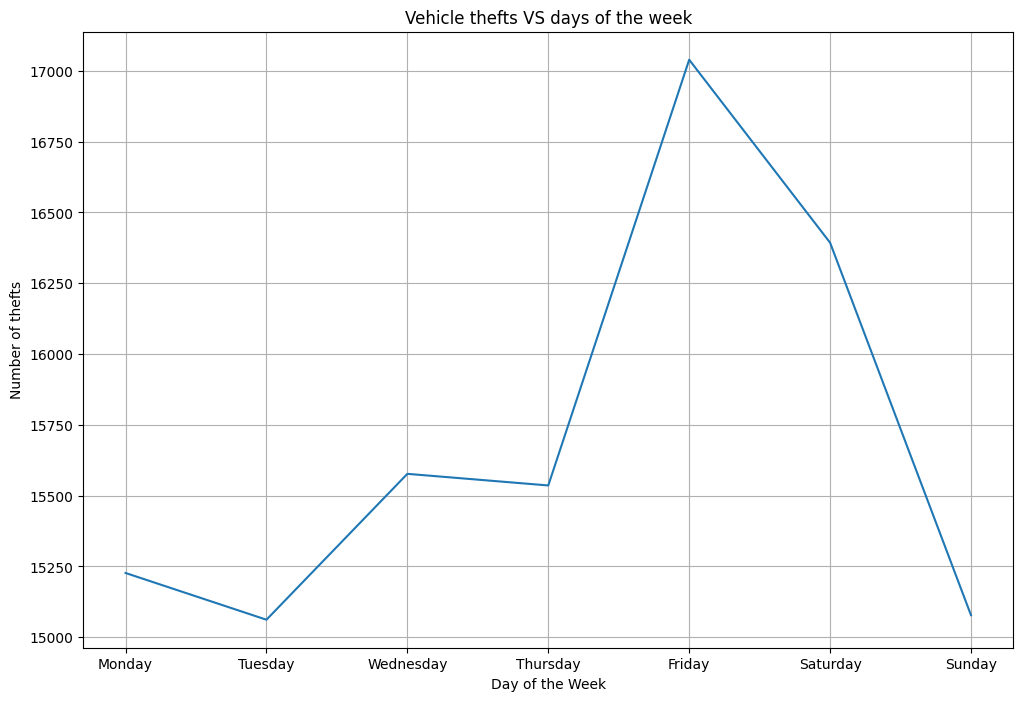

In [ ]:
#exploratory data analysis
#visualize theft occurrences by week days
df_vehicle_stolen['Week days'] = df_vehicle_stolen['DATE OCC'].dt.day_name()
# calculate the number of thefts per day of the week
day_of_week_counts = df_vehicle_stolen['Week days'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

#line chart
plt.figure(figsize=(12, 8))
sns.lineplot(x=day_of_week_counts.index, y=day_of_week_counts.values)
plt.title('Vehicle thefts VS days of the week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of thefts')
plt.grid(True)
plt.show()


from the graph it is evidant crime are highest on friday as sharply dip till sunday,and least on tuesday

<ipython-input-22-a0eaeeaa0039>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicle_stolen['Month'] = df_vehicle_stolen['DATE OCC'].dt.month
<ipython-input-22-a0eaeeaa0039>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicle_stolen['Season'] = df_vehicle_stolen['Month'].map({
<ipython-input-22-a0eaeeaa0039>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



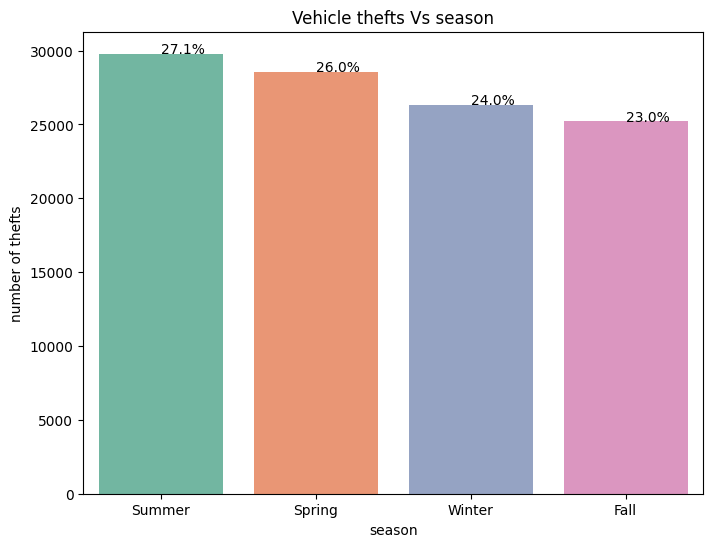

In [ ]:
df_vehicle_stolen['Month'] = df_vehicle_stolen['DATE OCC'].dt.month
df_vehicle_stolen['Season'] = df_vehicle_stolen['Month'].map({
    1: 'Winter', 2: 'Winter', 12: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})
#bar chart
season_counts = df_vehicle_stolen['Season'].value_counts()
season_percentages = (season_counts / season_counts.sum()) * 100

season_data = pd.DataFrame({
    'Number of thefts': season_counts,
    'Percentage': season_percentages
}).reset_index()
season_data.columns = ['Season', 'Number of thefts', 'Percentage']

plt.figure(figsize=(8, 6))
bar_chart = sns.barplot(data=season_data, x='Season', y='Number of thefts', palette='Set2')

for index, row in season_data.iterrows():
    bar_chart.text(index, row['Number of thefts'] , f'{row["Percentage"]:.1f}%')

plt.title('Vehicle thefts Vs season')
plt.xlabel('season')
plt.ylabel('number of thefts')
plt.show()


It can be observed that crime occuarance is highest in Spring, followed by Winter, then Summer and the least crime in all season were in fall.

<ipython-input-23-32553a64fe22>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top_areas, y='AREA NAME', palette='Purples', order=top_areas)


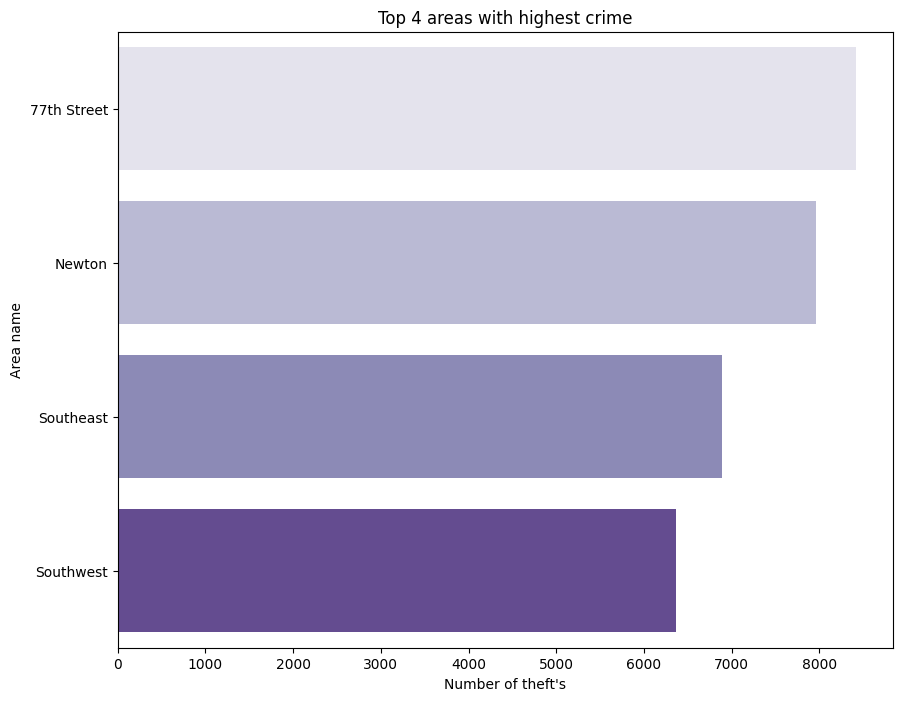

In [ ]:
#visualize thefts by neighborhood
plt.figure(figsize=(10, 8))
top_areas = df_vehicle_stolen['AREA NAME'].value_counts().head(4).index
df_top_areas = df_vehicle_stolen[df_vehicle_stolen['AREA NAME'].isin(top_areas)]
#count plot
sns.countplot(data=df_top_areas, y='AREA NAME', palette='Purples', order=top_areas)
plt.title('Top 4 areas with highest crime')
plt.xlabel("Number of theft's")
plt.ylabel('Area name')
plt.show()

The above graph shows the Top 4 Crime-Prone Areas (neighborhood), the highest no if crime were in Central, and least with Southwest

**d. Exploring cases in Identity Theft Cases in Los Angeles:**


*i.Explain your approach to this problem. Also provide features which you
think are important according to your problem statement.*

The process involves collecting data, cleaning and preprocessing it, performing exploratory data analysis, identifying patterns, and then building models to interpret the results. Some important features for this analysis include the demographics of the victims, types of crimes, methods of theft, time and location of the incidents, details about the perpetrators, financial losses, and how law enforcement responded. By analyzing these factors, we can find patterns, identify vulnerable groups, and develop better strategies to prevent identity theft in the future.

ii. Perform data cleaning to get the pure data for this problem. Explain your
data cleaning steps.

In [ ]:
df_all_theft = df.copy()

In [ ]:
df_all_theft = df_all_theft[df_all_theft['Crm Cd Desc'].isin([
'VEHICLE - STOLEN', 'BIKE - STOLEN','SHOPLIFTING-GRAND THEFT ($950.01 & OVER)', 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER', 'THEFT FROM MOTOR VEHICLE - ATTEMPT', 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 & OVER)',
 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)','THEFT PLAIN - PETTY ($950 & UNDER)','SHOPLIFTING - PETTY THEFT ($950 & UNDER)','EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)','DISHONEST EMPLOYEE - GRAND THEFT',
 'BURGLARY FROM VEHICLE, ATTEMPTED','VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)','BOAT - STOLEN','THEFT, COIN MACHINE - PETTY ($950 & UNDER)','BIKE - ATTEMPTED STOLEN','THEFT, COIN MACHINE - GRAND ($950.01 & OVER)',
])]

In [ ]:
df_all_theft['DATE OCC'] = pd.to_datetime(df_all_theft['DATE OCC'])
df_all_theft['Date Rptd'] = pd.to_datetime(df_all_theft['Date Rptd'])

<ipython-input-26-b9b6189d12e3>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_all_theft['DATE OCC'] = pd.to_datetime(df_all_theft['DATE OCC'])
<ipython-input-26-b9b6189d12e3>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_all_theft['Date Rptd'] = pd.to_datetime(df_all_theft['Date Rptd'])


In [ ]:
missing_values = df_all_theft.isna().sum()
total_rows = df_all_theft.shape[0]
missing_percentages = (missing_values / total_rows) * 100
print(missing_percentages)

Date Rptd           0.000000
DATE OCC            0.000000
TIME OCC            0.000000
AREA                0.000000
AREA NAME           0.000000
Part 1-2            0.000000
Crm Cd              0.000000
Crm Cd Desc         0.000000
Vict Age            0.000000
Vict Sex           53.736571
Vict Descent       53.738464
Premis Cd           0.002366
Premis Desc         0.019405
Weapon Used Cd     98.893937
Weapon Desc        98.893937
Status              0.000473
Status Desc         0.000000
Crm Cd 1            0.000947
Crm Cd 2           98.468929
Crm Cd 3           99.981542
Crm Cd 4          100.000000
LOCATION            0.000000
Cross Street       86.383643
LAT                 0.000000
LON                 0.000000
Hour                0.000000
dtype: float64


In [ ]:
df_all_theft['AREA NAME'].unique()

array(['Wilshire', 'Southwest', 'Van Nuys', 'West Valley', 'Hollenbeck',
       'Topanga', 'Rampart', 'Northeast', 'Devonshire', 'Southeast',
       'N Hollywood', 'Pacific', '77th Street', 'Newton', 'Central',
       'Harbor', 'West LA', 'Olympic', 'Mission', 'Foothill', 'Hollywood'],
      dtype=object)

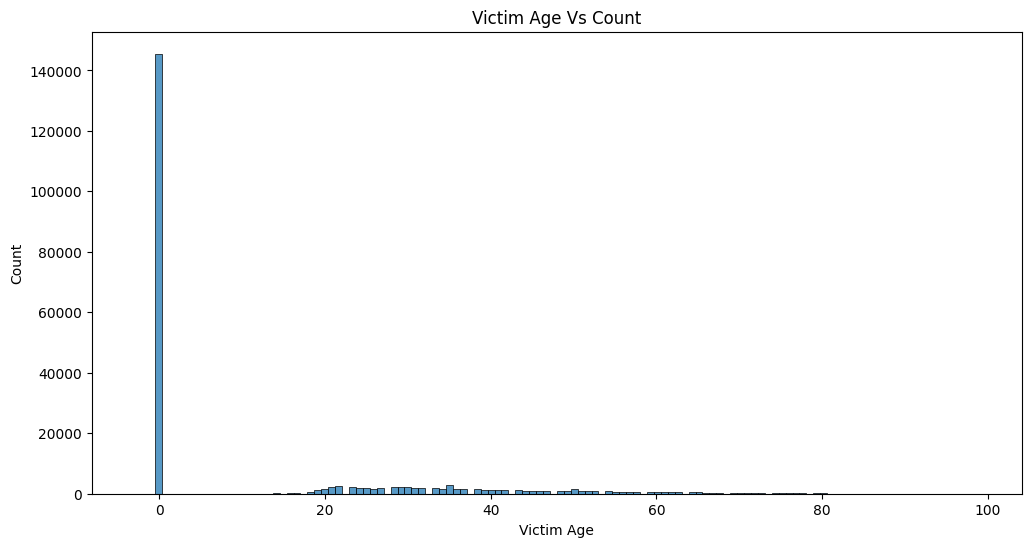

In [ ]:
#histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_all_theft['Vict Age'])
plt.title('Victim Age Vs Count')
plt.xlabel('Victim Age')
plt.ylabel('Count')
plt.show()

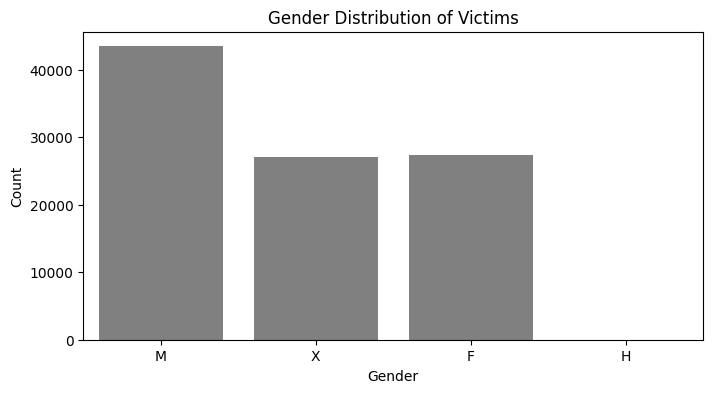

In [ ]:
#plot the gender distribution of victims
plt.figure(figsize=(8, 4))
sns.countplot(x='Vict Sex', data=df_all_theft,color="grey")
plt.title('Gender Distribution of Victims')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

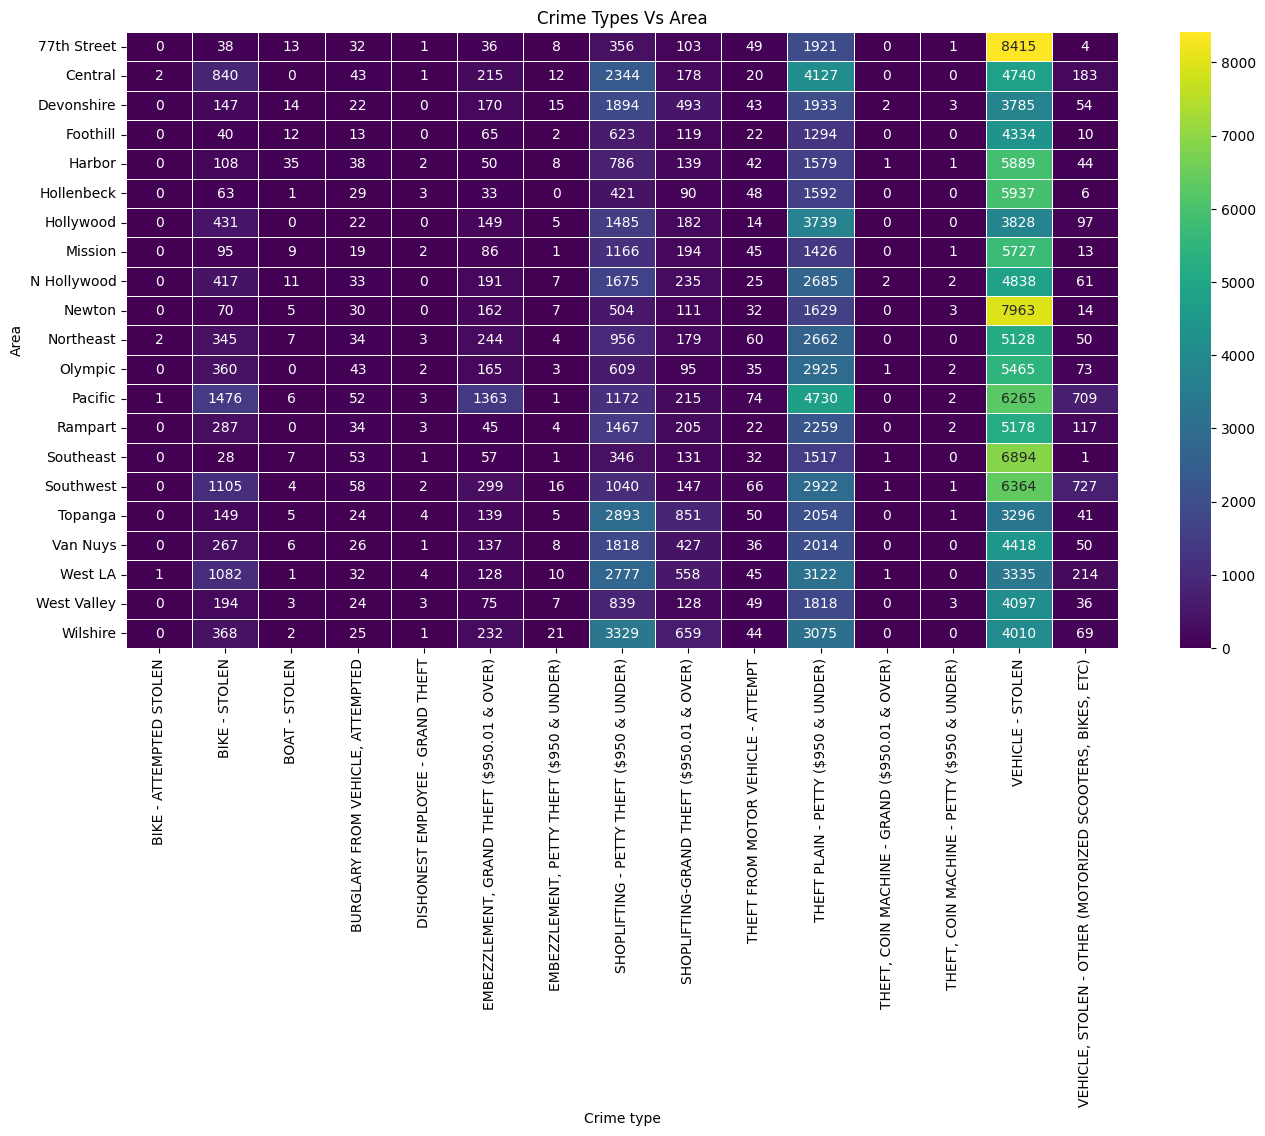

In [ ]:
crime_area = df_all_theft.groupby(['AREA NAME', 'Crm Cd Desc']).size().unstack()

crime_area = crime_area.fillna(0)
crime_area = crime_area.astype(int)

#heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(crime_area, annot=True, fmt='d', cmap='viridis', linewidths=.5)
plt.title('Crime Types Vs Area')
plt.xlabel('Crime type')
plt.ylabel('Area')
plt.show()


In [ ]:
 df_all_theft.drop(['Weapon Used Cd', 'Weapon Desc', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street'], axis=1, inplace=True)

In [ ]:
df_all_theft.isna().sum()

,0
Date Rptd,0
DATE OCC,0
TIME OCC,0
AREA,0
AREA NAME,0
Part 1-2,0
Crm Cd,0
Crm Cd Desc,0
Vict Age,0
Vict Sex,113540


In [ ]:
df_all_theft['Premis Desc'].dropna()

,Premis Desc
0,STREET
2,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)"
3,CLOTHING STORE
13,STREET
23,STREET
...,...
978611,STREET
978613,STREET
978615,OTHER STORE
978623,STREET


In [ ]:
df_all_theft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211290 entries, 0 to 978627
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date Rptd     211290 non-null  datetime64[ns]
 1   DATE OCC      211290 non-null  datetime64[ns]
 2   TIME OCC      211290 non-null  object        
 3   AREA          211290 non-null  int64         
 4   AREA NAME     211290 non-null  object        
 5   Part 1-2      211290 non-null  int64         
 6   Crm Cd        211290 non-null  int64         
 7   Crm Cd Desc   211290 non-null  object        
 8   Vict Age      211290 non-null  int64         
 9   Vict Sex      97750 non-null   object        
 10  Vict Descent  97746 non-null   object        
 11  Premis Cd     211285 non-null  float64       
 12  Premis Desc   211249 non-null  object        
 13  Status        211289 non-null  object        
 14  Status Desc   211290 non-null  object        
 15  Crm Cd 1      211288 n

In [ ]:
df_all_theft.dropna(inplace=True)

In [ ]:
df_all_theft.isna().sum()

,0
Date Rptd,0
DATE OCC,0
TIME OCC,0
AREA,0
AREA NAME,0
Part 1-2,0
Crm Cd,0
Crm Cd Desc,0
Vict Age,0
Vict Sex,0


In [ ]:
df_all_theft['Vict Sex'].unique()

array(['M', 'X', 'F', 'H'], dtype=object)

In [ ]:
one_hot_encoded_data = pd.get_dummies(df_all_theft['Vict Sex'], prefix='Vict_Sex', dtype='int64')
df_all_theft = pd.concat([df_all_theft, one_hot_encoded_data], axis=1)

In [ ]:
df_all_theft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97706 entries, 0 to 978615
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date Rptd     97706 non-null  datetime64[ns]
 1   DATE OCC      97706 non-null  datetime64[ns]
 2   TIME OCC      97706 non-null  object        
 3   AREA          97706 non-null  int64         
 4   AREA NAME     97706 non-null  object        
 5   Part 1-2      97706 non-null  int64         
 6   Crm Cd        97706 non-null  int64         
 7   Crm Cd Desc   97706 non-null  object        
 8   Vict Age      97706 non-null  int64         
 9   Vict Sex      97706 non-null  object        
 10  Vict Descent  97706 non-null  object        
 11  Premis Cd     97706 non-null  float64       
 12  Premis Desc   97706 non-null  object        
 13  Status        97706 non-null  object        
 14  Status Desc   97706 non-null  object        
 15  Crm Cd 1      97706 non-null  float64   